# COVID-19 SMALL PROJECT

Using data updated daily from ECDC's website, we take a look at the number of cases and deaths for countries within the dataset. We then focus on Switzerland's data. Note that the data is updated daily.

Link for the  data:
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

### What this Notebook shows:
1. General review and use of Pandas, Numpy, Matplotlib and Styling
2. Use of Markdown on Jupyter Notebook
3. Analyzing COVID-19's spreading rate in Switzerland
4. Possible ideas for future related projects (Forecasting, etc...)


## Importing World's COVID-19 Data

We start off by importing the data as a csv file, which is updated daily.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Project updated 3rd of April 2020

# load the csv file
df = pd.read_csv('/Users/dankendirli/Documents/Projects/AnalyzeData COVID/Covid-19.csv')

In [2]:
# Set the width of the number of characters for the rows and columns
pd.set_option('display.width', 320)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# check first five rows to see how data and headers look
print(df.head())

      dateRep  day  month  year  cases  deaths countriesAndTerritories geoId countryterritoryCode  popData2018
0  03/04/2020    3      4  2020     43       0             Afghanistan    AF                  AFG   37172386.0
1  02/04/2020    2      4  2020     26       0             Afghanistan    AF                  AFG   37172386.0
2  01/04/2020    1      4  2020     25       0             Afghanistan    AF                  AFG   37172386.0
3  31/03/2020   31      3  2020     27       0             Afghanistan    AF                  AFG   37172386.0
4  30/03/2020   30      3  2020      8       1             Afghanistan    AF                  AFG   37172386.0


In [4]:
# check last five rows to see how many total rows
print(df.tail())

         dateRep  day  month  year  cases  deaths countriesAndTerritories geoId countryterritoryCode  popData2018
8497  25/03/2020   25      3  2020      0       0                Zimbabwe    ZW                  ZWE   14439018.0
8498  24/03/2020   24      3  2020      0       1                Zimbabwe    ZW                  ZWE   14439018.0
8499  23/03/2020   23      3  2020      0       0                Zimbabwe    ZW                  ZWE   14439018.0
8500  22/03/2020   22      3  2020      1       0                Zimbabwe    ZW                  ZWE   14439018.0
8501  21/03/2020   21      3  2020      1       0                Zimbabwe    ZW                  ZWE   14439018.0


In [5]:
# Count how much data in each column
print(df.count())

dateRep                    8502
day                        8502
month                      8502
year                       8502
cases                      8502
deaths                     8502
countriesAndTerritories    8502
geoId                      8482
countryterritoryCode       8427
popData2018                8478
dtype: int64


In [6]:
# Statistical measures of all columns
print(df.describe())

               day        month         year         cases       deaths   popData2018
count  8502.000000  8502.000000  8502.000000   8502.000000  8502.000000  8.478000e+03
mean     16.683369     2.424371  2019.992120    117.648671     6.059163  6.677817e+07
std       9.332136     1.258350     0.088427    907.104400    52.331438  2.061102e+08
min       1.000000     1.000000  2019.000000     -9.000000     0.000000  1.000000e+03
25%       9.000000     2.000000  2020.000000      0.000000     0.000000  4.089400e+06
50%      18.000000     3.000000  2020.000000      0.000000     0.000000  1.062716e+07
75%      25.000000     3.000000  2020.000000      9.000000     0.000000  4.672375e+07
max      31.000000    12.000000  2020.000000  28819.000000  1059.000000  1.392730e+09


__Note__: Notice a __*-9 cases*__ for the minimum for "cases", that's interesting (definitely a mistake)

In [7]:
# See correlation within data
print(df.corr())

                  day     month      year     cases    deaths  popData2018
day          1.000000  0.059456 -0.136735  0.022920  0.014747    -0.030067
month        0.059456  1.000000 -0.678244  0.072499  0.072818    -0.054033
year        -0.136735 -0.678244  1.000000  0.011520  0.010320    -0.008027
cases        0.022920  0.072499  0.011520  1.000000  0.760263     0.106388
deaths       0.014747  0.072818  0.010320  0.760263  1.000000     0.061729
popData2018 -0.030067 -0.054033 -0.008027  0.106388  0.061729     1.000000


In [8]:
# How many countries are listed in the dataset
print(df.countriesAndTerritories.nunique())
# Comment by Dan: 202 on April 1st 2020

203


#### Find which country has the highest cases and how many:

In [9]:

# first find highest case number
max_value = df.cases.max()
print(max_value)

28819


In [10]:
# Then find its index to match country
country_index = df[df['cases'] == df.cases.max()].index.values
print(country_index)

[8217]


In [11]:
# max country based on index:
max_country = df.iloc[country_index, 6]
print(max_country)

8217    United_States_of_America
Name: countriesAndTerritories, dtype: object


#### Find which country has the lowest cases and how many:

In [12]:
# first find lowest case number
min_value = df.cases.min()
print(min_value)

-9


In [13]:
# Then find its index to match country
country_index2 = df[df['cases'] == df.cases.min()].index.values
print(country_index2)

[1497]


In [14]:
# min country based on index:
min_country = df.iloc[country_index2, 6]
print(min_country)

1497    Cases_on_an_international_conveyance_Japan
Name: countriesAndTerritories, dtype: object


In [15]:
# How many instances where at least 10 cases FOR EVERY COUNTRY were reported in a single day
df2 = df[df['cases']>= 10]
print(df2.count())
# Comment by Dan: 1904 instances

dateRep                    2101
day                        2101
month                      2101
year                       2101
cases                      2101
deaths                     2101
countriesAndTerritories    2101
geoId                      2101
countryterritoryCode       2088
popData2018                2101
dtype: int64


##### Population could be used to insert a new column (Total Cases per Population) and compare the ratios between countries.


# Case Study on Switzerland

Here we focus on Switzerland and have some fun with the data. Explore some styling and visualization. First we start by making a new dataframe.

In [16]:
# This shows all 2020 cases of Switzerland
df4 = df[df['countriesAndTerritories']=='Switzerland']

In [17]:
# How many instances where at least 10 cases were reported in a single day
df3 = df2[df2['countriesAndTerritories'] == 'Switzerland']
Swiss_cases = df3.count()
print(Swiss_cases)
# Comment by Dan: 27 on April 1st 2020, Note that the first case was on 25/02/2020

dateRep                    29
day                        29
month                      29
year                       29
cases                      29
deaths                     29
countriesAndTerritories    29
geoId                      29
countryterritoryCode       29
popData2018                29
dtype: int64


In [18]:
# rename all columns
df4.columns = ['Date', 'D', 'M', 'Y', 'Cases', 'Deaths', 'Countries', 'Geolocal', 'Country Code' , 'Population']

Check data type of each column, notice "Date" is not in __datetime__ format. We can use the command print(df4.info()) to check the data type of each column. Date formatting also seems to be wrong since download (months and days format sometimes inversed). We will fix that.

In [19]:
# delete unrequired columns: Date, Countries, Geolocal, Country Code, Population
df4 = df4.drop(columns= ['Date','Countries','Geolocal', 'Country Code', 'Population'])

In [20]:
# Create a New Date column based on the Day, Month and Year columns and delete the D, M and Y columns
# Automatic data type change as well
Date = pd.to_datetime((df4.Y*10000+df4.M*100+df4.D).apply(str), format='%Y%m%d')
df4.insert(0,"Date", Date)
df4 = df4.drop(columns= ['D','M','Y'])
# print(df4.info())

In [21]:
# Delete unrequired days of data (days where there were 0 cases and 0 deaths)

unrequired_days = df4[(df4['Deaths'] == 0) & (df4['Cases'] == 0)].index
df4.drop(unrequired_days, inplace = True)


__Note:__ between 26-28/02/2020: one case disappeared within those 2 days. Also no cases between 16-18/03/2020.

In [22]:
# Reset the indexes
df4 = df4.reset_index(drop=True)

In [23]:
# save data to new csv
# df4.to_csv('Covid_19_Switzerland_Data.csv')
# check df4
df4

,Date,Cases,Deaths
0,2020-04-03,1774,158
1,2020-04-02,962,5
2,2020-04-01,696,78
3,2020-03-31,1138,38
4,2020-03-30,1122,22
5,2020-03-29,1048,38
6,2020-03-28,1390,36
7,2020-03-27,1000,58
8,2020-03-26,925,17
9,2020-03-25,774,20


We could have some fun styling the dataframe with __highlights__. I put some code below commented.

In [24]:
# Styling ideas for the dataframe

# highlight max values in table in red
# def highlight_max(s):
#     '''
#     highlight the maximum in a Series yellow.
#     '''
#     is_max = s == s.max()
#     return ['background-color: red' if v else '' for v in is_max]

# df4.style.apply(highlight_max)

# Or for minimum:

# def highlight_min(s):
#     '''
#     highlight the minimum in a Series blue.
#     '''
#     is_min = s == s.min()
#     return ['background-color: blue' if v else '' for v in is_min]

# df4.style.apply(highlight_min)

In [25]:
# Highlight Deaths and Cases values with bars
df4.style.bar(subset=['Cases', 'Deaths'], color='#d65f5f')

,Date,Cases,Deaths
0,2020-04-03 00:00:00,1774,158
1,2020-04-02 00:00:00,962,5
2,2020-04-01 00:00:00,696,78
3,2020-03-31 00:00:00,1138,38
4,2020-03-30 00:00:00,1122,22
5,2020-03-29 00:00:00,1048,38
6,2020-03-28 00:00:00,1390,36
7,2020-03-27 00:00:00,1000,58
8,2020-03-26 00:00:00,925,17
9,2020-03-25 00:00:00,774,20


Let's get down to the statistics and plotting:

In [26]:
# Count how much data in each column
print(df4.count())

Date      37
Cases     37
Deaths    37
dtype: int64


In [27]:
# Statistical measures of all columns
print(df4.describe())

             Cases      Deaths
count    37.000000   37.000000
mean    509.297297   14.486486
std     510.172567   30.072710
min       0.000000    0.000000
25%      30.000000    0.000000
50%     267.000000    2.000000
75%     952.000000   13.000000
max    1774.000000  158.000000


In [28]:
# Total number of cases and deaths
sum_cases = df4['Cases'].sum()
sum_deaths = df4['Deaths'].sum()
print('The total number of reported cases is ' + str(sum_cases) + '.')
print('The total number of reported deaths is ' + str(sum_deaths) + '.')

The total number of reported cases is 18844.
The total number of reported deaths is 536.


In [29]:
# Average number of cases and deaths
ave_cases = df4['Cases'].mean()
ave_deaths = df4['Deaths'].mean()
print('The average number of reported cases daily is ' + str(ave_cases) + '.')
print('The average number of reported deaths daily is ' + str(ave_deaths) + '.')

The average number of reported cases daily is 509.2972972972973.
The average number of reported deaths daily is 14.486486486486486.


In [30]:
# Highest reported days for cases and deaths
max_cases = df4['Cases'].max()
max_deaths = df4['Deaths'].max()
print('The max number of reported cases in a day is ' + str(max_cases) + '.')
print('The max number of reported deaths in a day is ' + str(max_deaths) + '.')

The max number of reported cases in a day is 1774.
The max number of reported deaths in a day is 158.


In [31]:
# Find index to match cases date
max_cases_index = df4[df4['Cases'] == df4.Cases.max()].index.values
print(max_cases_index)

[0]


In [32]:
# Find which day that was
max_day_cases = df4.iloc[max_cases_index, 0]
print(max_day_cases)

0   2020-04-03
Name: Date, dtype: datetime64[ns]


//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<BarContainer object of 37 artists>

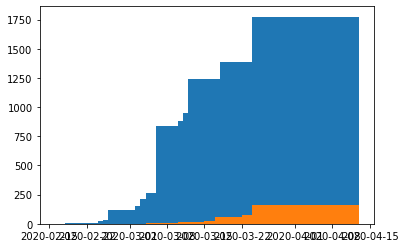

In [33]:
# Plots
plt.bar(df4['Date'], df4['Cases'], width=20)
plt.bar(df4['Date'], df4['Deaths'], width=20)

__Note:__ Many plots could be made using the matplotlib library but exporting the data onto PowerBI or Tableau definitely is a better choice as interactive dashboards can be made on those softwares.

## Conclusion:

We saw the power of pandas, numpy, matplotlib and the fun of using those libraries with some styling in Python. The visualization would definitely look better on PowerBI or Tableau. It is also more user/customer-friendly as you can create simple interactive dashboards for  people who want to explore the data within the case study. This project doesn't really bring out much that isn't on the news. It just shows the fun in coding and finding those analytics. Forecasting models could be considered when/if there will be more data.